# Inflation annual growth rate

In [2]:
# Subscribe to api.insee.fr and get your credentials!
# Save your credentials with init_conn function :
# from pynsee.utils.init_conn import init_conn
# init_conn(insee_key="my_insee_key", insee_secret="my_insee_secret")

# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import clear_all_cache; clear_all_cache()"

In [3]:
from pynsee.macrodata import *

%matplotlib inline
import matplotlib.pyplot as plt
from textwrap import wrap

df_idbank = get_series_list("IPC-2015")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.NATURE == "INDICE") & # index
                          (df_idbank.PRIX_CONSO == "SO") & 
                          (df_idbank.MENAGES_IPC == "ENSEMBLE") & # all kinds of household
                          (df_idbank.REF_AREA == "FE") & # all France including overseas departements
                          (df_idbank.COICOP2016.str.match("^[0-9]{2}$"))] # coicop aggregation level

# get data
data = get_series(df_idbank.IDBANK)

# compute year over year growth rate by IDBANK
data['pct_yoy'] = (data.OBS_VALUE/ data.groupby(['IDBANK']).OBS_VALUE.shift(12) - 1) * 100
data.to_csv('ipc.csv')

Getting datasets list:   0%|          | 0/199 [00:00<?, ?it/s]

Getting datasets list:  57%|█████▋    | 114/199 [00:00<00:00, 1129.51it/s]

Getting datasets list: 100%|██████████| 199/199 [00:00<00:00, 1181.58it/s]

IPC-2015 : metadata update triggered because it is not found locally

1/1 - Getting series:   0%|          | 0/13 [00:00<?, ?it/s]

1/1 - Getting series:   8%|▊         | 1/13 [00:00<00:03,  3.09it/s]

1/1 - Getting series:  15%|█▌        | 2/13 [00:00<00:03,  3.23it/s]

1/1 - Getting series:  23%|██▎       | 3/13 [00:00<00:02,  3.38it/s]

1/1 - Getting series:  31%|███       | 4/13 [00:01<00:02,  3.02it/s]

1/1 - Getting series:  38%|███▊      | 5/13 [00:01<00:02,  3.22it/s]

1/1 - Getting series:  46%|████▌     | 6/13 [00:01<00:02,  3.35it/s]

1/1 - Getting series:  54%|█████▍    | 7/13 [00:02<00:01,  3.39it/s]

1/1 - Getting series:  62%|██████▏   | 8/13 [00:02<00:01,  3.50it/s]

1/1 - Getting series:  69%|██████▉   | 9/13 [00:02<00:01,  3.57it/s]

1/1 - Getting series:  77%|███████▋  | 10/13 [00:02<00:00,  3.61it/s]

1/1 - Getting series:  85%|████████▍ | 11/13 [00:03<00:00,  3.51it/s]

1/1 - Getting series:  92%|█████████▏| 12/13 [00:03<00:00,  3.53it/s]

1/1 - Getting series: 100%|██████████| 13/13 [00:03<00:00,  3.12it/s]

1/1 - Getting series: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]


Data has been cached


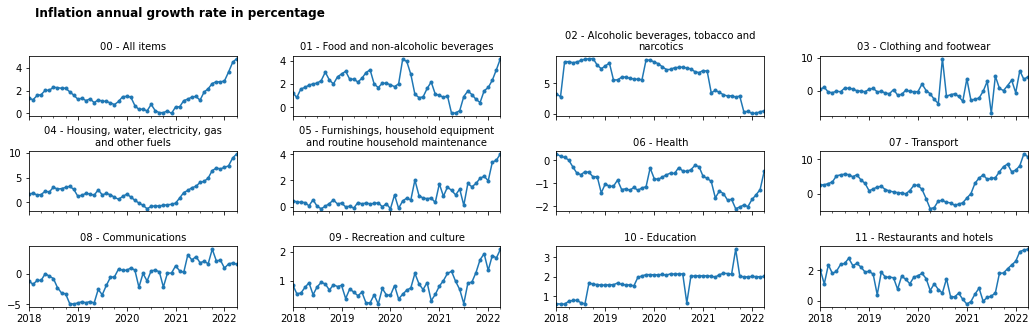

In [4]:
# select dates after 2018-01-01
data = data.loc[data.DATE >= "2018-01-01"]

def make_clean_label(string):
    return("\n".join(wrap(string, 40)))

data['label'] = data['COICOP2016_label_en'].map(make_clean_label)

# plot
fig, axes = plt.subplots(3,4, figsize=(15,5), sharex=True)
plt.suptitle("Inflation annual growth rate in percentage", x = 0.05, y = 0.95,
             horizontalalignment= 'left', 
             fontsize = 12, fontweight='bold')
fig.tight_layout(pad = 2.5)
for (title, group), ax in zip(data.groupby('label'), axes.flatten()):
        group.plot(x='DATE', y='pct_yoy',
                    kind='line', ax=ax,
                    marker='o', markersize=3,
                    legend=False)
        ax.set_title(f'%s' % title,fontsize = 10)
        ax.xaxis.label.set_visible(False)